In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Transfer Learning with TensorFlow: Feature Extraction**

To improve models we can use several tenchniques like
- Adding More Layers
- Changing the Learning Rate
- Adjusting the Number of Neurons Per Layer

However, instead of above we can use **Transfer Learning**.
- **Transfer Learning** is taking the patterns (also called weights) from another model and applying it on new problem.

Two main benefits of using Transfer Learning.
- Leverage existing Neural Network Architecture proven to work on problems similar to our own
- Using **Already Learned Patterns** on similar data to our own

So, instead of hand-crafting our own **Neural Network Architecture or building them from scratch** we can utilize models which have worked for others.

We can take the patterns a model has learned from datasets such as **ImageNet** and use it as a foundational model.

**What we will Learn**
- Use a smaller dataset to experiment faster (10% of training samples of 10 classes of food)
- Build a Transfer Learning Feature Extraction model using **TensorFlow Hub**
- Introduce a TesnorBoard Callback to track model training results

**Transfer Learning with TensorFlow Hub: Getting great results with only 10% of data**

- **TensorFlow Hub:-** is a repository for existing model components. You can import and use a **Fully Trained Model** using a *URL*

Using the **Pre-trained Models** we can get the results of a fully trained model with only 10% of data.

**Transfer Learning often allows you to get great results with less data**


Let's download 10% of training data from **10_food_classes** dataset and use it to train a food image classifier on it.















In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

--2025-09-23 09:30:33--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.141.207, 74.125.137.207, 142.250.101.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.141.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   181MB/s    in 0.9s    

2025-09-23 09:30:34 (181 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [ ]:
import zipfile
zip_ref = zipfile.ZipFile("10_food_classes_10_percent.zip")
zip_ref.extractall()
zip_ref.close()

In [ ]:
import os

for dirpath, dirnames, filenames in os.walk("10_food_classes_10_percent"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")


There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/train'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_wings'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ice_cream'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/pizza'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/steak'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/hamburger'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/grilled_salmon'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_curry'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/sushi'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ramen'.
There are 0 directories and 75 images in '10_food_classes_10_percent/trai

**Creating Data Loaders (Preparing the Data)**

- Create the **ImageDataGenerator** class using the **flow_from_directory** method to load in our images.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SHAPE = (224, 224)
BATCH_SIZE = 32

train_dir = "10_food_classes_10_percent/train/"
test_dir = "10_food_classes_10_percent/test/"

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

print("Training Images")
train_data_10_percent = train_datagen.flow_from_directory(train_dir,
                                                          target_size=IMAGE_SHAPE,
                                                          batch_size=BATCH_SIZE,
                                                          class_mode="categorical"
                                                          )


print("Testing Images")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=IMAGE_SHAPE,
                                             batch_size=BATCH_SIZE,
                                             class_mode="categorical"
                                             )



Training Images
Found 750 images belonging to 10 classes.
Testing Images
Found 2500 images belonging to 10 classes.


**Setting Up Callbacks (Things to Run While our Model Trains)**

**Callbacks** are extra functionality that you can add to your models to be performed during or after training. Some of the most important callbacks are

- **Experiment Tracking with TensorBoard:-** Log the performance of multiple models and then view and compare these models in a visual way on **TensorBoard**. **TensorBoard** is a dashboard for inspecting **Neural Network Parameters**

- **Model CheckPointing:-** Save your model as you train so that you can stop training if needed and continue off where you left. It is helpful if training takes a long time and cannot be done in one sitting.

- **Early Stopping:-** Leave your model training for a arbitary amount of time and have it stop training automatically when it ceases to improve. It is helpful when you have a large dataset and do not know how long training will take.

- The TensorBoard Callback can be accessed using
**tf.keras.callbacks.TensorBoard()**. - The main function of this is saving model's training performance metrics to a specified **log_dir**.

- By default, logs are recorded every epoch using the **update_freq='epoch'** parameter. This is a good default but can slow down **Model Training.**





In [ ]:
# Creating a tensorboard callback

import datetime
def create_tensorboard_callback(dir_name, experiment_name):
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback


- We will save the **Model** to a directory [dir_name] / [experiment_name] / [current_timestamp] where
- **dir_name:-** is the overall logs directory
- **experiment_name:-** is the particular experiment
- **current_timestamp:-** is the time the experiment started based on Python time *datatime.datetime().now()

**Creating Models Using TensorFlow Hub**

- In past we used to create models from scratch
- In here, majority of our model's layers are going to come from **TensorFlow Hub**

We will use two models from **TensorFlow Hub**

- 1.**ResNetV2** - a state of the art computer vision model architecture from 2016
- 2.**EfficientNet**- a state of the art computer vision model from 2019

By the state of art we mean that majority of our modeles have achieved the lowest error rate on **ImageNet (ILSVRC-2012-CLS)**, the gold standard of computer vision benchmarks.

Steps for finding models on **TensorFlow Hub**
1. Got to **tfhub.dev**
2. Select the problem domain like **Image**
3. Remove all **Problem Domain** filters except for the one you are working on
4. You will see a list of models, select the one you want to use

**I see many models, then which one is to be used**

- You can find a list of state of the art models on **paperswithcode.com**, a resource for collecting the latest in deep learning paper results

- Since, our target is **Image Classification** so we would use the model that performed best on **ImageNet.**

- On **tfhub.dev** you will find various architectures like **EfficientNetB4** which is better than **EfficientNetB0** but larger models take alot of time to compute.


We will use feature vectors URLs of two common computer vision architectures, **EfficientNetBO (2019)** and **ResNetV250 (2016)**

Why we select only **Feature Vectors**.
Because Transfer Learning come into play as **Feature Extraction** and **Fine Tuning**

1. In **transfer Learning** we take a pre-trained models as it is and apply it to our task without changes. For example, if your model is trained on **ImageNet** dataset that contains **1000** different classes of images. So, if we pass a single image to this model it will produce **1000** different outputs. It can be useful if we want to classify **1000** images.

2. **Feature Extraction Transfer Learning** is a process where you take the underlying patterns (also called weights) a **pretrained Model** has learned and adjust its output to be more suited to your problem.
For example, If your model had 236 different layers (EfficientNetBO has 236 layers) and the top layer outputs **1000** classes because it was pretrained on **ImageNet.**To adjust it to your problem we might remove the top layer and replace it with our own having the right number of classes. The most important part here is that **only the top few layers become trainable, the rest remain frozen.**So, the underlying patterns remain in the rest of layers and we can utilize it for our problem.

3. **Fine-Tuning Transfer Learning:-** is when you take the underlying patterns (also called weights) of a pre-trained model and adjust them to your problem. This means **training some, many or all layers** in pretrained model. This is applicable in scenarios where you have relatively large dataset and **your data is slightly different** from the original data on which the model was trained.


A common practice is to **Freeze** all the learned patterns in bottom layers of a **pretrained model** so that they become **un-trainable**. Then, the top 2-3 layers of the **pre-trained** model can adjust its output to our customer data (**feature extraction**).
As you have trained the **top layers** you can gradually **unfreeze** more and more layers and run the training process on your own data to further **fine-tune**it.

- **Lower Layers** in a computer vision model learns **large features**. In a cat and dog classification they might learn the **outline of legs** while the layers closer to the output might learn **shape of the teeth.**


So, in **Feature Extraction** only the top 2-3 layers change but in **Fine Tuning Model** many or all of the original model get changed.





In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers

In [ ]:
# Resnet 50 V2 feature vector
resnet_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4"

# Original: EfficientNetB0 feature vector (version 1)
efficientnet_url = "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"

# # New: EfficientNetB0 feature vector (version 2)
# efficientnet_url = "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b0/feature_vector/2"


- The **URLs** are link to a saved **pretrained models** on **TensorFlow Hub**.
- When we use it in our model, the model will automatically downloaded for us to use
- We will use **KerasLayer()** inside the TensorFlow Hub library.

- The function below helps in creating **Model**.
- Our first model will be **ResNetV250** architecture as our feature extraction layer
- Once our model is instantiated, we will compile it using **categorical_crossentropy** as our loss function, **Adam Optimizer** and **Accuracy** as metric.

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras
from tensorflow.keras import layers

# Define constants
IMAGE_SHAPE = (224, 224)
NUM_CLASSES = 10  # Replace with the actual number of classes in your dataset
RESNET_URL = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4"

# Custom layer to wrap hub.KerasLayer
class HubLayer(tf.keras.layers.Layer):
    def __init__(self, model_url, **kwargs):
        super(HubLayer, self).__init__(**kwargs)
        self.hub_layer = hub.KerasLayer(model_url, trainable=False)

    def call(self, inputs):
        return self.hub_layer(inputs)

def create_model_tf_hub_fixed(model_url, num_classes=NUM_CLASSES):
    # Define input layer
    inputs = keras.Input(shape=IMAGE_SHAPE + (3,))

    # Apply custom Hub layer
    x = HubLayer(model_url)(inputs)

    # Add dropout and dense layers
    x = layers.Dropout(0.2)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    # Create model
    model = keras.Model(inputs, outputs)

    return model

# Clear Keras session
tf.keras.backend.clear_session()

# Disable mixed precision
tf.keras.mixed_precision.set_global_policy('float32')

# Create and compile the model
resnet_model = create_model_tf_hub_fixed(RESNET_URL, num_classes=NUM_CLASSES)
resnet_model.compile(
    loss="categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# Display model summary
resnet_model.summary()




Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hub_layer (HubLayer)            │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        20,490 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,490 (80.04 KB)

 Trainable params: 20,490 (80.04 KB)

 Non-trainable params: 0 (0.00 B)

**Adding the CallBack**
- A tensorflow **CallBack** adds extra functionality by virtue of which we can track the performance of our model on TensorBoard
- The **CallBack** is added in the **fit** method

In [ ]:
resnet_history = resnet_model.fit(
    train_data_10_percent,
    epochs=5,
    steps_per_epoch=len(train_data_10_percent),
    validation_data=test_data,
    validation_steps=len(test_data),
    callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub",
                                           experiment_name="resnet50V2")]
)


## Transfer Learning with TensorFlow Part 2: Fine-Tuning

- In the section above we saw how could we leverage **Feature Extraction Transfer Learning** to get far better results than building our own models
- In **Fine Tuning Transfer Learning** the pre-trained weights from another model are **unfrozen and tweaked** during training to better suit your own data
- In the **Feature Extraction Transfer Learning** we train the top **1-3 layers** of a pre-trained model with your own data
- In the **Fine-tuning transfer learning** we might train 1 to 3 or more layers of a pre-trained model

**Main Difference between Feature Extraction Transfer Learning and Fine Tuning Transfer Learning**
- **Feature Extraction Transfer Learning:** You only train top layers
- **Fine Tuning Transfer Learning:** Not only top layers but some other layers beneath can be unfrozen for training.

**Path Ahead**

- **Introducing Fine-Tuning:** A type of transfer learning to modify a pre-trained model to more suited to your data
- Using **Keras Functional API**, a different way to build models in keras
- Using smaller dataset to experiment faster
- **Data Augmentation:** How to making training diverse without adding any new data

**Helper Functions**

In [3]:
### We create a bunch of helpful functions throughout the course.
### Storing them here so they're easily accessible.

import tensorflow as tf

# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224, scale=True):
  """
  Reads in an image from filename, turns it into a tensor and reshapes into
  (224, 224, 3).

  Parameters
  ----------
  filename (str): string filename of target image
  img_shape (int): size to resize target image to, default 224
  scale (bool): whether to scale pixel values to range(0, 1), default True
  """
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode it into a tensor
  img = tf.image.decode_jpeg(img)
  # Resize the image
  img = tf.image.resize(img, [img_shape, img_shape])
  if scale:
    # Rescale the image (get all values between 0 and 1)
    return img/255.
  else:
    return img

# Note: The following confusion matrix code is a remix of Scikit-Learn's
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
import itertools
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15, norm=False, savefig=False):
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
    norm: normalize values or not (default=False).
    savefig: save confusion matrix to file (default=False).

  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes),
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)

  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    if norm:
      plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)
    else:
      plt.text(j, i, f"{cm[i, j]}",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)

  # Save the figure to the current working directory
  if savefig:
    fig.savefig("confusion_matrix.png")

# Make a function to predict on images and plot them (works with multi-class)
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

import datetime

def create_tensorboard_callback(dir_name, experiment_name):
  """
  Creates a TensorBoard callback instand to store log files.

  Stores log files with the filepath:
    "dir_name/experiment_name/current_datetime/"

  Args:
    dir_name: target directory to store TensorBoard log files
    experiment_name: name of experiment directory (e.g. efficientnet_model_1)
  """
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir=log_dir
  )
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback

# Plot the validation and training data separately
import matplotlib.pyplot as plt

def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.

  Args:
    history: TensorFlow model History object (see: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/History)
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

def compare_historys(original_history, new_history, initial_epochs=5):
    """
    Compares two TensorFlow model History objects.

    Args:
      original_history: History object from original model (before new_history)
      new_history: History object from continued model training (after original_history)
      initial_epochs: Number of epochs in original_history (new_history plot starts from here)
    """

    # Get original history measurements
    acc = original_history.history["accuracy"]
    loss = original_history.history["loss"]

    val_acc = original_history.history["val_accuracy"]
    val_loss = original_history.history["val_loss"]

    # Combine original history with new history
    total_acc = acc + new_history.history["accuracy"]
    total_loss = loss + new_history.history["loss"]

    total_val_acc = val_acc + new_history.history["val_accuracy"]
    total_val_loss = val_loss + new_history.history["val_loss"]

    # Make plots
    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(total_acc, label='Training Accuracy')
    plt.plot(total_val_acc, label='Validation Accuracy')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(2, 1, 2)
    plt.plot(total_loss, label='Training Loss')
    plt.plot(total_val_loss, label='Validation Loss')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.xlabel('epoch')
    plt.show()

# Create function to unzip a zipfile into current working directory
# (since we're going to be downloading and unzipping a few files)
import zipfile

def unzip_data(filename):
  """
  Unzips filename into the current working directory.

  Args:
    filename (str): a filepath to a target zip folder to be unzipped.
  """
  zip_ref = zipfile.ZipFile(filename, "r")
  zip_ref.extractall()
  zip_ref.close()

# Walk through an image classification directory and find out how many files (images)
# are in each subdirectory.
import os

def walk_through_dir(dir_path):
  """
  Walks through dir_path returning its contents.

  Args:
    dir_path (str): target directory

  Returns:
    A print out of:
      number of subdiretories in dir_path
      number of images (files) in each subdirectory
      name of each subdirectory
  """
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

# Function to evaluate: accuracy, precision, recall, f1-score
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  """
  Calculates model accuracy, precision, recall and f1 score of a binary classification model.

  Args:
      y_true: true labels in the form of a 1D array
      y_pred: predicted labels in the form of a 1D array

  Returns a dictionary of accuracy, precision, recall, f1-score.
  """
  # Calculate model accuracy
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  # Calculate model precision, recall and f1 score using "weighted average
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1}
  return model_results



**10 Food Classes: Working with Less Data**

- Below we will use the **in-built pretrained models** within the **tf.keras.applications** module as well as we will **fine-tune** them to our customer dataset.
- We will be using a new but similar dataloader function to what we have used before called **image_dataset_from_directory()** which is part of **tf.keras.utils** module.
- Finally, we will practice **Keras Functional API** for building deep learning models.
- The **Functional API** is a more flexible way to create models than **tf.keras.Sequential API.**















**Download the Data**

In [ ]:
# Get 10% of the data of the 10 classes
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

unzip_data("10_food_classes_10_percent.zip")

--2025-10-01 06:05:57--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.97.207, 108.177.125.207, 142.250.157.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.97.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M  30.0MB/s    in 6.4s    

2025-10-01 06:06:03 (25.0 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [ ]:
# Walk through 10 percent data directory and list number of files
walk_through_dir("10_food_classes_10_percent")


There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/train'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/fried_rice'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ice_cream'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/grilled_salmon'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/hamburger'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_curry'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_wings'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/steak'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/sushi'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ramen'.
There are 0 directories and 75 images in '10_food_classes_10_percent

The **training data** has **75 images** while the testing directories have **250 images.**

In [ ]:
# Create training and test directories
train_dir = "10_food_classes_10_percent/train/"
test_dir = "10_food_classes_10_percent/test/"

- Previously we used the **ImageDataGenerator** class but since **August 2023** it has been deprecated and is not recommended for future usage because of its **slowness.**

- We will move onto using **tf.keras.utils.image_dataset_from_directory()**

- One main benefit of using **tf.keras.preprocessing.image_dataset_from_directory()** rather than **ImageDataGenerator** is that it creates a **tf.data.Dataset** object rather than a generator

- The **tf.data.Dataset** API is much more efficient(faster) than the **ImageDataGenerator** API which is paramount for larger datasets

In [ ]:
# Create data inputs
import tensorflow as tf
IMG_SIZE = (224, 224) # define image size
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                            image_size=IMG_SIZE,
                                                                            label_mode="categorical", # what type are the labels?
                                                                            batch_size=32) # batch_size is 32 by default, this is generally a good number

test_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                           image_size=IMG_SIZE,
                                                                           label_mode="categorical")


Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


Main Components of **image_dataset_from_directory()** function

- **directory:-** the filepath of the target directory we are loading images in from
- **image_size:-** target size
- **batch_size:-** batch size we are going to load in
- **label_mode:-** If only two classes then **binary** otherwise for more than two classes we use **categorical**

In [ ]:
# Check the training data datatype
train_data_10_percent

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

**train_data_10_percent** attributes

- **(TensorSpec(shape=(None, 224, 224, 3)** refers to the tensor shape of our images. *None* is the batch size. 224 is height and 224 is the width. **3** is the color channels (red, green, blue)

- **(None, 10):-** refers to the tensor shape of the labels. **None** is the batch size and **10** is the number of possible labels.

In [ ]:
# Check out the class names of our dataset
train_data_10_percent.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [ ]:

# See an example batch of data
for images, labels in train_data_10_percent.take(1):
  print(images, labels)

tf.Tensor(
[[[[182.07143   148.07143    87.071434 ]
   [177.66837   145.66837    86.668365 ]
   [178.85713   148.2857     91.50001  ]
   ...
   [188.85217   158.85217   104.85218  ]
   [202.71437   173.71437   117.71438  ]
   [217.35732   188.35732   132.35732  ]]

  [[181.56631   146.56631    90.42347  ]
   [176.93367   144.93367    87.93367  ]
   [179.67346   149.10204    93.88776  ]
   ...
   [194.0409    164.68369   112.35716  ]
   [195.15308   165.15308   111.153076 ]
   [198.36224   168.36224   114.36225  ]]

  [[178.71428   143.5        89.92857  ]
   [177.5       144.5        91.841835 ]
   [176.04593   144.47449    93.688774 ]
   ...
   [190.04596   160.3061    110.90306  ]
   [193.55615   163.55615   113.44388  ]
   [195.70918   165.70918   114.13775  ]]

  ...

  [[165.28575   172.92854   139.50002  ]
   [169.41322   176.41322   142.41322  ]
   [165.07141   171.40811   135.23976  ]
   ...
   [210.69392   177.69392   123.73983  ]
   [211.29585   179.29585   122.29586  ]
   [2

**Model 0: Building a transfer learning model using the Keras Functional API**

- The **tf.keras.applications** modules contains a series of already trained **(ImageNet)** computer vision module as well as **Keras Functional API**

We are going to go through the following steps

- Initialize a pre-trained base model by using a target model such as **EfficientNetV2B0** from **tf.keras.applications.efficientnet_V2** setting **include_top** to **False** to freeze all of the weights because we will build our own top
- Set the base model to **trainable** attribute to **False** to freeze all of the weights in the pre-trained model
- Define an **input Layer** for our model
- **Optional** Normalize the input because some models work better on **Normalized Data** where the input is between 0 and 1.
- Pass the input to the **base model.**
- Pool the outputs of the **base model** into a shape compatiable with the output activation layer. This turns the **base model output** into same shape as **label tensors.** This can be done using **tf.keras.layers.GlobalAveragePooling2D()** or **tf.keras.layers.GlobalMaxPooling2D** but the former is more common
- Create an output **activation** function using **tf.keras.Model()**.
- Compile the model using appropriate **loss function** and choose an **optimizer**
- Finally, **Fit()** the model using desired number of **epochs** including the desired **callbacks**
























In [4]:
# 1. Create the base model and do not include the top
base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)

# 2. Freeze the base model and set it's training to False
base_model.trainable = False

# 3. Create inputs into the model
inputs = tf.keras.layers.Input(shape=(224, 224, 3),
                               name="input_layer")

# 4. If using ResNet50V2, add following to speed up convergence
# x = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)(inputs)
'''

     5. Pass the inputs to the base_model
     (note: using tf.keras.applications,
     EfficientNetV2 inputs don't have to be normalized)

'''
x = base_model(inputs)
# Check data shape after passing it to base_model
print(f"Shape after base_model: {x.shape}")

'''
       6. Average pool the outputs of the base model
       (aggregate all the most important information,
       reduce number of computations)
 '''
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
print(f"After GlobalAveragePooling2D(): {x.shape}")

# 7. Create the output activation layer
outputs = tf.keras.layers.Dense(10,
                                activation="softmax",
                                name="output_layer")(x)

# 8. Combine the inputs with the outputs into a model
model_0 = tf.keras.Model(inputs, outputs)

# 9. Compile the model
model_0.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])



24274472/24274472 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Shape after base_model: (None, 7, 7, 1280)
After GlobalAveragePooling2D(): (None, 1280)


In [ ]:
# 10. Fit the model (we use less steps for validation so it's faster)
history_10_percent = model_0.fit(train_data_10_percent,
                                 epochs=5,
                                 steps_per_epoch=len(train_data_10_percent),
                                 validation_data=test_data_10_percent,
                                 # Go through less of the validation data so epochs are faster (we want faster experiments!)
                                 validation_steps=int(0.25 * len(test_data_10_percent)),
                                 # Track our model's training logs for visualization later
                                 callbacks=[create_tensorboard_callback("transfer_learning", "10_percent_feature_extract")])


Saving TensorBoard log files to: transfer_learning/10_percent_feature_extract/20251001-072556
Epoch 1/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 90s 3s/step - accuracy: 0.2657 - loss: 2.1697 - val_accuracy: 0.6941 - val_loss: 1.3816
Epoch 2/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 68s 3s/step - accuracy: 0.7273 - loss: 1.2370 - val_accuracy: 0.7911 - val_loss: 0.9257
Epoch 3/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 82s 3s/step - accuracy: 0.8183 - loss: 0.8542 - val_accuracy: 0.8454 - val_loss: 0.7284
Epoch 4/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 82s 3s/step - accuracy: 0.8332 - loss: 0.7050 - val_accuracy: 0.8569 - val_loss: 0.6225
Epoch 5/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 69s 3s/step - accuracy: 0.8919 - loss: 0.5998 - val_accuracy: 0.8668 - val_loss: 0.5704


**Results**

- After small training our model performed well on both the **training** and **test** sets
- All the good results came because of **Transfer Learning**

- In above model what we used is called **Feature Extraction Transfer Learning**
- We passed our customer data to the **already pre-trained model** called **EfficientNetV2B0** to find the patterns that it sees. We then put another layers on top to make our model output our **desired number of classes.**
- We also used **Keras Functional API** to build our model rather than the **Sequential API.**

**Let's inspect the Layers in our model**

In [ ]:
# Check layers in our base model
# enumerate() is a Python function that lets you loop through a list with an index.
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name)

0 input_layer
1 rescaling
2 normalization
3 stem_conv
4 stem_bn
5 stem_activation
6 block1a_project_conv
7 block1a_project_bn
8 block1a_project_activation
9 block2a_expand_conv
10 block2a_expand_bn
11 block2a_expand_activation
12 block2a_project_conv
13 block2a_project_bn
14 block2b_expand_conv
15 block2b_expand_bn
16 block2b_expand_activation
17 block2b_project_conv
18 block2b_project_bn
19 block2b_drop
20 block2b_add
21 block3a_expand_conv
22 block3a_expand_bn
23 block3a_expand_activation
24 block3a_project_conv
25 block3a_project_bn
26 block3b_expand_conv
27 block3b_expand_bn
28 block3b_expand_activation
29 block3b_project_conv
30 block3b_project_bn
31 block3b_drop
32 block3b_add
33 block4a_expand_conv
34 block4a_expand_bn
35 block4a_expand_activation
36 block4a_dwconv2
37 block4a_bn
38 block4a_activation
39 block4a_se_squeeze
40 block4a_se_reshape
41 block4a_se_reduce
42 block4a_se_expand
43 block4a_se_excite
44 block4a_project_conv
45 block4a_project_bn
46 block4b_expand_conv
47 b

In [ ]:
model_0.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetv2-b0 (Functional)  │ (None, 7, 7, 1280)     │     5,919,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling_layer    │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │        12,810 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,957,744 (22.73 MB)

 Trainable params: 12,810 (50.04 KB)

 Non-trainable params: 5,919,312 (22.58 MB)

 Optimizer params: 25,622 (100.09 KB)

**Model Summary**

- The overall model has 4 layers out of which **efficientnetv2-b0** has 269 layers
- Look at the total number of parameters and the **total trainable** parameters. There is a big difference because of **transfer learning**

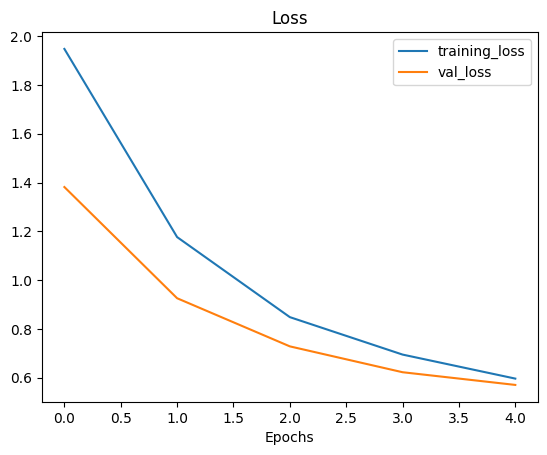

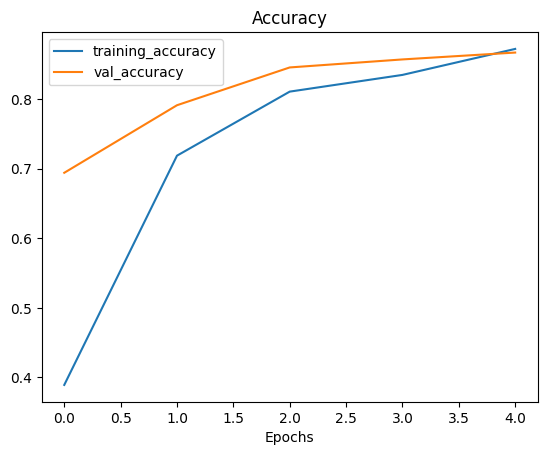

In [ ]:
plot_loss_curves(history_10_percent)

**Getting a feature vector from a trained model**

- The **tf.keras.layers.GlobalAveragePooling2D()** layer transforms a 4D tensor into a 2D tensor by averaging the values acroos the inner-axes.

To explain.

For example we have a tensor of (1,4,4,3) then it is
- 1 then batch size
- 4,4 the image height and width
- 3 the color channels
*So we have 3 feature maps of size 4x4 each*

What **GlobalAveragePooling2D** does

- For each *4x4* whose count is 3, it computers the **average of all 16 numbers.**
- That turns each *4x4* into **1 number**










In [ ]:
input_shape = (1,4,4,3)

tf.random.set_seed(42)
input_tensor = tf.random.normal(input_shape)
print(f"Random Tensor is:\n {input_tensor}")

# Pass the random tensor through a global average pooling 2D layer
global_average_pooled_tensor = tf.keras.layers.GlobalAveragePooling2D()(input_tensor)
print(f"2D global average pooled random tensor:\n {global_average_pooled_tensor}\n")

# Check the shapes of the different tensors
print(f"Shape of input tensor: {input_tensor.shape}")
print(f"Shape of 2D global averaged pooled input tensor: {global_average_pooled_tensor.shape}")



Random Tensor is:
 [[[[ 0.3274685  -0.8426258   0.3194337 ]
   [-1.4075519  -2.3880599  -1.0392479 ]
   [-0.5573232   0.539707    1.6994323 ]
   [ 0.28893656 -1.5066116  -0.26454744]]

  [[-0.59722406 -1.9171132  -0.62044144]
   [ 0.8504023  -0.40604794 -3.0258412 ]
   [ 0.9058464   0.29855987 -0.22561555]
   [-0.7616443  -1.891714   -0.9384712 ]]

  [[ 0.77852213 -0.47338897  0.97772694]
   [ 0.24694404  0.20573747 -0.5256233 ]
   [ 0.32410017  0.02545409 -0.10638497]
   [-0.6369475   1.1603122   0.2507359 ]]

  [[-0.41728497  0.40125778 -1.4145442 ]
   [-0.59318566 -1.6617213   0.33567193]
   [ 0.10815629  0.2347968  -0.56668764]
   [-0.35819843  0.88698626  0.5274477 ]]]]
2D global average pooled random tensor:
 [[-0.09368646 -0.45840445 -0.28855976]]

Shape of input tensor: (1, 4, 4, 3)
Shape of 2D global averaged pooled input tensor: (1, 3)


- As shown above the *tensor.keras.layers.GlobalAveragePooling2D()* layer condensed the input tensor of shape *(1,4,4,3)* to *(1,3)*
- It did so by averaging the *input_tensor* across the middle two axes

- We can do the above operation using *tf.reduce_mean()* by specifying the appropriate axes

In [ ]:
tf.reduce_mean(input_tensor, axis=[1,2])

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[-0.09368646, -0.45840445, -0.28855976]], dtype=float32)>

**Running a Series of Transfer Learning Experiments**

- We saw that with only **10% of training data** we can achieve good results then what about **1%** of data.

We will run a few modelling experiments

- **Model 1:** Use feature extraction transfer learning on **1%** of training data with **data augmentation.**
- **Model 2:** Use **Feature Extraction Transfer Learning** on **10%** of training data with **data augmentation** and save the results to a checkpoint
- **Model 3:** Fine tune **Model 2** checkpoint on **10% of training data** with data augmentation
- **Model 4:** Fine tune **Model 2** checkpoint on *100%* of training data with data augmentation

- All of the above experiments will be carried out on different data, the evaluation will be done on **same test dataset** to ensure the results of each experiment are as comparable as possible.
- All the experiments will be done using **EfficientNetV2B0** model using the *tf.keras.applications.efficientnet_v2* module
- To keep track of experiments, we will use *create_tensorboard_callback()* function to log all the model training logs

- In the model instead of implementing **data augmentation** in the **ImageDataGenerator** class like previous practice, we will build it right into the model using *tf.keras.layers* module.

In [1]:
# Download and unzip data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip



--2025-10-02 10:32:24--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.98.207, 74.125.135.207, 142.250.107.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.98.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M   105MB/s    in 1.2s    

2025-10-02 10:32:25 (105 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



In [5]:
unzip_data("10_food_classes_1_percent.zip")

In [6]:
# Create training and test dirs
train_dir_1_percent = "10_food_classes_1_percent/train/"
test_dir = "10_food_classes_1_percent/test/"

In [7]:
# Walk through 1 percent data directory and list number of files
walk_through_dir("10_food_classes_1_percent")

There are 2 directories and 0 images in '10_food_classes_1_percent'.
There are 10 directories and 0 images in '10_food_classes_1_percent/train'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/fried_rice'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/pizza'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/ramen'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/ice_cream'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/chicken_curry'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/grilled_salmon'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/steak'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/hamburger'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/chicken_wings'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/sushi'.
There a

**Load images** in the **tf.data.Dataset** objects.
- We will use the *image_dataset_from_directory()* method.

In [8]:
import tensorflow as tf
IMG_SIZE = (224, 224)

train_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir_1_percent,
                                                                            label_mode="categorical",
                                                                            batch_size =32,
                                                                            image_size=IMG_SIZE)

test_data = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                label_mode="categorical",
                                                                image_size=IMG_SIZE)

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


**Adding Data Augmentation Right into the Model**

- Previously we used **ImageDataGenerator** class for data augmentation of our training images.
- Now we are going to build **data augmentation** right into the model

We will use **tf.keras.layers** module and create a dedicated **data augmentation layer.**

*This concept is relatively new in TensorFlow 2.10 but is very powerful.It has the following benefits*

- Preprocessing of images (Augmenting them) happens on *GPU* rather than *CPU*
- Images are best preprocessed on *GPU* rather than *CPU*. *CPU* is more suited to **Text and Structured Data**.

- **Image Data Augmentation** only happens during **training** so we can still export our whole model and use it elsewhere which means that your trained model can be saved and shared without all the **augmented data** and the model **remember the features it learned**.
- If someone wants to **retrain the model from scratch** or **train it on new data**, they might want to **use the same augmentation** to ensure that the model learns features in a robust way and we get consistent results.


**Important Note**
*When passed as a layer to a model data augmentation is automatically **turned on** during training and is not applied


- To use **data augmentation** right within our model we will create a **Keras Sequential Model** consisting of only **data preprocessing layers**
- We will use this **Sequential Model** within another **Functional Model.**

data_augmentation = keras.Sequential([
  layers.RandomFlip("horizontal"),
  layers.RandomRotation(0.2),
  layers.RandomZoom(0.2),
  layers.RandomHeight(0.2),
  layers.RandomWidth(0.2),
], name ="data_augmentation")

- **layers.RandomFlip:** flips image on horizontal or vertical axis
- **tf.keras.layers.RandomRotation:** randomly rotates image by a specified amount
- **tf.keras.layers.RandomZoom:** randomly zooms into an image by specified amount
- **tf.keras.layers.RandomHeight:** randomly shifts image height by a specified amount
- **tf.keras.layers.Rescaling:** normalizes the image pixel values to be between 0 and 1.

In [9]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Data Augmentation
data_augmentation = keras.Sequential([
  layers.RandomFlip("horizontal"),
  layers.RandomRotation(0.2),
  layers.RandomZoom(0.2),
  layers.RandomHeight(0.2),
  layers.RandomWidth(0.2),], name ="data_augmentation")


Our **data augmentation Sequential Model** is ready to go. We will slot this **model** as a **layer** into our **transfer Learning model** later on.

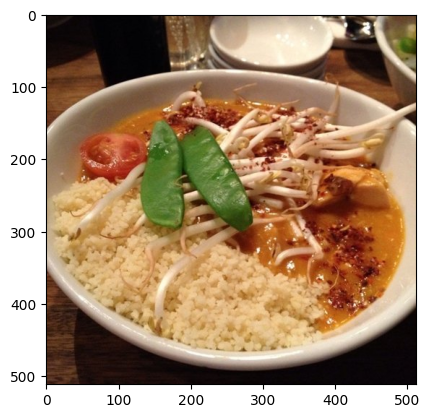

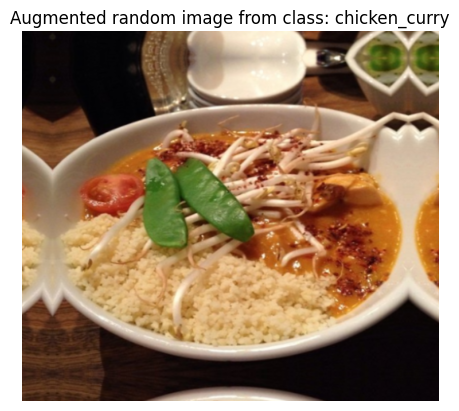

In [10]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random

# Select an image randomly
target_class = random.choice(train_data_1_percent.class_names)
# Select the target directory
target_dir = "10_food_classes_1_percent/train/" + target_class

'''
Select the target image. The os.listdire(target_dir)
lists all the files in that directory.
With random.choice we select one image randomly.
'''
random_image = random.choice(os.listdir(target_dir))
random_image_path = target_dir + "/" + random_image
img = mpimg.imread(random_image_path)
plt.imshow(img)

'''
Usually an image is a 3D-array/tensor with (Height, width, channels).
The action tf.expand_dim(img, axis=0) does an expansion.
(H, W, C) ---> (1, H, W, C) because most of preprocessing layers in keras
expects a batch of images even if it is a single image.
'''
augmented_img = data_augmentation(tf.expand_dims(img, axis=0)) # data augmentation model requires shape (None, height, width, 3)
plt.figure()
plt.imshow(tf.squeeze(augmented_img)/255.) # requires normalization after augmentation
plt.title(f"Augmented random image from class: {target_class}")
plt.axis(False);




As we can see that **different random augmentation** is being applied to different classes of images.
- We will add **data augmentation model** as a layer in our upcoming **transfer learning models.**
- **Data Augmentation** will add variations to our data helping the model not to *overfit.*

**Model 1: Feature Extraction Transfer Learning on 1% of the data with data augmentation**

In [12]:
# Setup input shape and base model, freezing the base model layers
input_shape = (224, 224, 3)
base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)
base_model.trainable = False

# Create input layer
inputs = layers.Input(shape=input_shape, name="input_layer")

# Add in data augmentation Sequential model as a layer
x = data_augmentation(inputs)

# Give base_model inputs (after augmentation) and don't train it
x = base_model(x, training=False)

# Pool output features of base model
x = layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)

# Put a dense layer on as the output
outputs = layers.Dense(10, activation="softmax", name="output_layer")(x)

# Make a model with inputs and outputs
model_1 = keras.Model(inputs, outputs)

# Compile the model
model_1.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_1_percent = model_1.fit(train_data_1_percent,
                    epochs=5,
                    steps_per_epoch=len(train_data_1_percent),
                    validation_data=test_data,
                    validation_steps=int(0.25* len(test_data)), # validate for less steps
                    # Track model training logs
                    callbacks=[create_tensorboard_callback("transfer_learning", "1_percent_data_aug")])

ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "functional_1" is incompatible with the layer: expected shape=(None, 512, 512, 3), found shape=(None, 224, 224, 3)[0m

Arguments received by Sequential.call():
  • args=('<KerasTensor shape=(None, 224, 224, 3), dtype=float32, sparse=False, ragged=False, name=input_layer>',)
  • kwargs={'mask': 'None'}

With only **1%** data using **transfer learning** we were able to achieve *41%* accuracy on validation set.

In [ ]:
model_1.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ data_augmentation (Sequential)  │ (None, None, None, 3)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetv2-b0 (Functional)  │ (None, None, None,     │     5,919,312 │
│                                 │ 1280)                  │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling_layer    │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │        12,810 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,957,744 (22.73 MB)

 Trainable params: 12,810 (50.04 KB)

 Non-trainable params: 5,919,312 (22.58 MB)

 Optimizer params: 25,622 (100.09 KB)

- We now have **data augmentation** built into our model. Which means that if we save the model and load it from somewhere, it will have data augmentation in it.
- Important thing to remember is that **data augmentation only runs during training.**
- If we use our model for **prediction or inference** the **data augmentation** layer will be **off** automatically turned off.

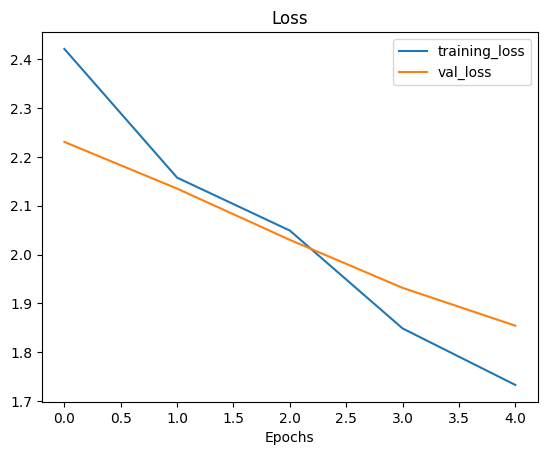

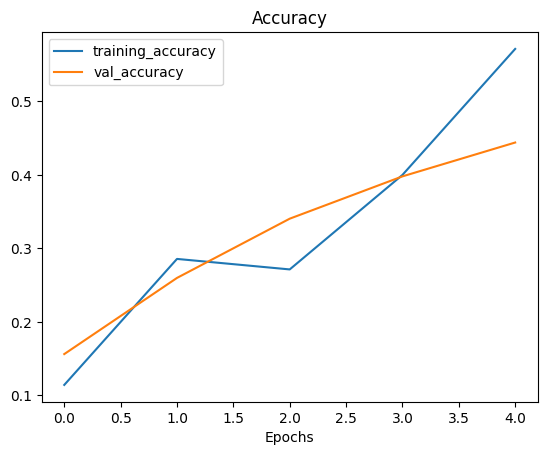

In [ ]:
plot_loss_curves(history_1_percent)

**Model 2: Feature extraction transfer learning with 10% of data and data augmentation**

- We tested our model with **1% of training data with augmentation**, now we will test it with **10** of data

- **Machine Learning** is an iterative process, and we must try a few things to develop an intution of what to try
- So, we are now trying the model with with 10% of data.




In [13]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
unzip_data("10_food_classes_10_percent.zip")

--2025-10-02 10:38:40--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.98.207, 74.125.135.207, 142.250.107.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.98.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   220MB/s    in 0.7s    

2025-10-02 10:38:40 (220 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [14]:
train_dir_10_percent = "10_food_classes_10_percent/train/"
test_dir = "10_food_classes_10_percent/test/"

**Create the Data Loader**

In [15]:
import tensorflow as tf
IMG_SIZE = (224,224)

train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir_10_percent,
                                                                            label_mode="categorical",
                                                                            batch_size=32,
                                                                            image_size=IMG_SIZE)

test_data= tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                label_mode="categorical",
                                                                image_size=IMG_SIZE)



Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


**Incorporating Data Augmentation**

- We will reuse the *data augmentation Sequential Model* we created before but we will re-create it for practice

In [16]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

'''
Create data augmentation stage with horizontal flipping,
rotations, zoom, height/width.
'''

data_augmentation = Sequential([
  layers.RandomFlip("horizontal"),
  layers.RandomRotation(0.2),
  layers.RandomZoom(0.2),
  layers.RandomHeight(0.2),
  layers.RandomWidth(0.2),
], name="data_augmentation")


# Setup the input of the model
input_shape=(224,224,3)

# Create a Frozen Base Model
base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)
base_model.trainable = False

'''
- Create an entry point for the model. Saying that the model expects a particular shape
- Apply random transformations (flips, rotations, zooms)
- Send the augmented image to the base model. Freeze its internal layers
- Take the feature map from the base model and average them
- Put a dense layer on top of it
'''

inputs = layers.Input(shape=input_shape, name="input_layer")
x = data_augmentation(inputs)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
outputs = layers.Dense(10, activation="softmax", name="output_layer")(x)
model_2 = keras.Model(inputs, outputs)

# Compile the model
model_2.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=["accuracy"])

# Fit the model


**To save time let's put all of the above code in a function**

In [51]:
import tensorflow as tf
from tensorflow.keras import layers as L

def create_base_model(input_shape: tuple[int, int, int] = (224, 224, 3),
                      output_shape: int = 10,
                      learning_rate: float = 0.001,
                      training: bool = False) -> tf.keras.Model:
    """
    Create a model based on EfficientNetV2B0 with built-in data augmentation.

    Parameters:
    - input_shape (tuple): Expected shape of input images. Default is (224, 224, 3).
    - output_shape (int): Number of classes for the output layer. Default is 10.
    - learning_rate (float): Learning rate for the Adam optimizer. Default is 0.001.
    - training (bool): Whether the base model is trainable. Default is False.

    Returns:
    - tf.keras.Model: The compiled model with specified input and output settings.
    """

    # Create base model
    base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)
    base_model.trainable = training

    # Setup model input and outputs with data augmentation built-in
    inputs = L.Input(shape=input_shape, name="input_layer")
    x = data_augmentation(inputs)
    x = base_model(x, training=False)  # pass augmented images to base model but keep it in inference mode
    x = L.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
    outputs = L.Dense(units=output_shape, activation="softmax", name="output_layer")(x)
    model = tf.keras.Model(inputs, outputs)

    # Compile model
    model.compile(loss="categorical_crossentropy",
                  optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  metrics=["accuracy"])

    return model

In [52]:
model_2 = create_base_model()

In [19]:
model_2.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ data_augmentation (Sequential)  │ (None, None, None, 3)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetv2-b0 (Functional)  │ (None, None, None,     │     5,919,312 │
│                                 │ 1280)                  │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling_layer    │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │        12,810 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,932,122 (22.63 MB)

 Trainable params: 12,810 (50.04 KB)

 Non-trainable params: 5,919,312 (22.58 MB)

- **input_layer:** It is the input layer. (None, 224, 224, 3), None means the batch size, 224 is the height and width and 3 is the no of color channels while **Params=0** means no parameters here, just a place holder

- **data_augmentation (Sequential):** The (None, None, None, 3), the Height/Width are flexible and here **None** means dynamic depending on what you pass. **Params=0** means that it is just augmentation and no learnable parameters are here.

- **efficientnetv2-b0 (Functional):** This is the **pre-trained EfficientNetV2-BO backbone.** The output shape (None, None, None, 1280), The 1280 is the feature maps (channels). **Height & Width depend on input size after downsampling**. An image of 224x224 input is reduced to (7x7). **Params = 5,919,312** are weigths of **EfficientNetV2-BO)**


- **global_average_pooling_layer (GlobalAveragePooling2D)**
Input Shape: (None, 7, 7, 1280)
Output Shape: (None, 1280)
This takes each of the 1280 feature maps (size 7x7) and reduces them to 1 number each (average of the grid).
So you go from a 3D block (7x7x1280) → a 1D vector of length 1280.
**Params: 0 (no learnable parameters, just averaging).**

**Creating a Model Checkpoint callback**

- We have not fit our model yet
- Now we will introduce a new callback, the *ModelCheckpoint* callback
- The *ModelCheckpoint* callback gives you the ability to **save our model** to a specified directory as it trains
- This is **helpful** if your model will train for longer and you want to make **backups** as it trains
- It helps in **training a model** for a long time and you can reload it from a *specific checkpoint* and *continue training* from there
- Suppose you trained a **model for 5 epochs** and you see it was still improving but you want to **fine-tune** for another **5 epochs** then you can load the checkpoint, unfreeze some of the base model layers and continue training.









Let's create a **ModelCheckpoint** callback. We will specify a directory where we will save results

In [20]:
# Setup checkpoint path
checkpoint_path = "ten_percent_model_checkpoints_weights/checkpoint.weights.h5"

# Create a ModelCheckPoint callback that saves the model weight's only
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                          save_weights_only=True,
                                                          save_best_only=True,
                                                          save_freq ="epoch",
                                                          verbose=1
                                                         )


- **SavedModel** format saves a model's architecture, *weights and training configuration* all in one folder.
- This makes it easy to *reload your model* exactly how it is used elsewhere
- Mostly we only save the *weigths* so that it can be shared easily
- Also, if disk space is the issue then saving only *weights* is faster and takes up less space than the whole model.

- In code below we will add **checkpoint_callback** in our **callbacks** list.

In [21]:
initial_epochs=5
history_10_percent = model_2.fit(train_data_10_percent,
                                 epochs=initial_epochs,
                                 steps_per_epoch=len(train_data_10_percent),
                                 validation_data=test_data,
                                 validation_steps=int(0.25*len(test_data)),
                                 callbacks=[create_tensorboard_callback("transfer_learning", "10_percent_data_aug"),
                                                     checkpoint_callback])




Saving TensorBoard log files to: transfer_learning/10_percent_data_aug/20251002-104317
Epoch 1/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step - accuracy: 0.2391 - loss: 2.1794
Epoch 1: val_loss improved from inf to 1.48831, saving model to ten_percent_model_checkpoints_weights/checkpoint.weights.h5
24/24 ━━━━━━━━━━━━━━━━━━━━ 28s 577ms/step - accuracy: 0.2430 - loss: 2.1730 - val_accuracy: 0.6069 - val_loss: 1.4883
Epoch 2/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step - accuracy: 0.5691 - loss: 1.5206
Epoch 2: val_loss improved from 1.48831 to 1.09654, saving model to ten_percent_model_checkpoints_weights/checkpoint.weights.h5
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 404ms/step - accuracy: 0.5705 - loss: 1.5178 - val_accuracy: 0.7188 - val_loss: 1.0965
Epoch 3/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step - accuracy: 0.7008 - loss: 1.2027
Epoch 3: val_loss improved from 1.09654 to 0.87408, saving model to ten_percent_model_checkpoints_weights/checkpoint.weights.h5
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 420ms/step 

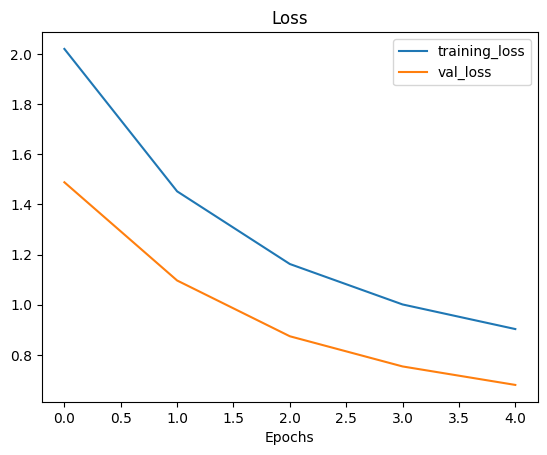

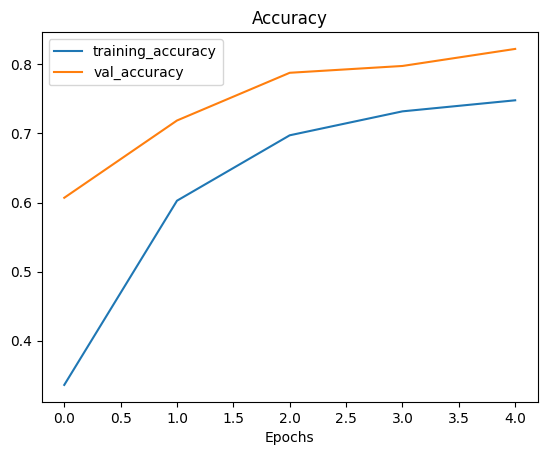

In [22]:
plot_loss_curves(history_10_percent)

**Checking the Results**
- From the results above it is evident that our **model's performance with 10% of data and data augmentation** is not as good as we would have expected.
- However, from model results it is clear that the curves are trending in the right direction, meaning if we decide to train for longer, its metrics would likely improve

- Since we **Checkpoint our model's weigths** we can load it and check it how they function.
- We can **load the saved model** and test it on **test data**

**Loading the Saved Model**
- We will load the saved model using **load_weigths()** method by passing it the path where our model is saved.

In [23]:
# Load the saved model
model_2.load_weights(checkpoint_path)
# Evaluate the model
loaded_weights_model_results = model_2.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - accuracy: 0.8153 - loss: 0.6942


In [46]:
loaded_weights_model_results

[0.6928282976150513, 0.8123999834060669]

**Model 3: Fine-tuning an existing model on 10% of the data**

- **High Level Example of Fine Tuning:** Bottom Layers(Layers close to input) stay **frozen** while the top layers **layers close to the output data** are updated during training

- In the above **10% data via EfficientNetV2B0** all the layers were frozen during training
- Now we will switch to **Fine Tuning Transfer Learning**
- We will use the same **base model** but will unfreeze some of its layers, **ones close to the top** and runing the model for a few more epochs

*Idea of fine-tuning transfer learning is to start customizing the pre-trained model more to our data*


**Note:** Fine tuning works best after training a feature extraction model for a few epochs with **large amount of data**.













In [24]:
# model_2 layers
model_2.layers

[<InputLayer name=input_layer, built=True>,
 <Sequential name=data_augmentation, built=True>,
 <Functional name=efficientnetv2-b0, built=True>,
 <GlobalAveragePooling2D name=global_average_pooling_layer, built=True>,
 <Dense name=output_layer, built=True>]

In [25]:
for layer_number, layer in enumerate(model_2.layers):
  print(f"Layer number: {layer_number} | Layer name: {layer.name} | Layer type: {layer} | Trainable? {layer.trainable}")


Layer number: 0 | Layer name: input_layer | Layer type: <InputLayer name=input_layer, built=True> | Trainable? True
Layer number: 1 | Layer name: data_augmentation | Layer type: <Sequential name=data_augmentation, built=True> | Trainable? True
Layer number: 2 | Layer name: efficientnetv2-b0 | Layer type: <Functional name=efficientnetv2-b0, built=True> | Trainable? False
Layer number: 3 | Layer name: global_average_pooling_layer | Layer type: <GlobalAveragePooling2D name=global_average_pooling_layer, built=True> | Trainable? True
Layer number: 4 | Layer name: output_layer | Layer type: <Dense name=output_layer, built=True> | Trainable? True


So, we have **input_layer** followed by **data_augmentation layer** followed by **efficientnetv2-b0**, then an **global_average_pooling_layer** and in the end the **output_layer**

In [26]:
model_2.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ data_augmentation (Sequential)  │ (None, None, None, 3)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetv2-b0 (Functional)  │ (None, None, None,     │     5,919,312 │
│                                 │ 1280)                  │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling_layer    │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │        12,810 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,957,744 (22.73 MB)

 Trainable params: 12,810 (50.04 KB)

 Non-trainable params: 5,919,312 (22.58 MB)

 Optimizer params: 25,622 (100.09 KB)

Hence, our base model **efficientnetv2-b0** layers are frozen. We can confirm this by **trainable_variables** attribute

In [27]:
# Access the base_model layers of model_2
model_2_base_model = model_2.layers[2]
model_2_base_model.name

'efficientnetv2-b0'

In [28]:
# How many layers are trainable in our model_2_base_model?
print(len(model_2_base_model.trainable_variables))
# layer at index 2 is the EfficientNetV2B0 layer (the base model)


0


In [47]:
# Check which layers are tuneable or trainable
for layer_number, layer in enumerate(model_2_base_model.layers):
  print(f"{layer_number} {layer.name} {layer.trainable}")

0 input_layer_6 False
1 rescaling_4 False
2 normalization_4 False
3 stem_conv False
4 stem_bn False
5 stem_activation False
6 block1a_project_conv False
7 block1a_project_bn False
8 block1a_project_activation False
9 block2a_expand_conv False
10 block2a_expand_bn False
11 block2a_expand_activation False
12 block2a_project_conv False
13 block2a_project_bn False
14 block2b_expand_conv False
15 block2b_expand_bn False
16 block2b_expand_activation False
17 block2b_project_conv False
18 block2b_project_bn False
19 block2b_drop False
20 block2b_add False
21 block3a_expand_conv False
22 block3a_expand_bn False
23 block3a_expand_activation False
24 block3a_project_conv False
25 block3a_project_bn False
26 block3b_expand_conv False
27 block3b_expand_bn False
28 block3b_expand_activation False
29 block3b_project_conv False
30 block3b_project_bn False
31 block3b_drop False
32 block3b_add False
33 block4a_expand_conv False
34 block4a_expand_bn False
35 block4a_expand_activation False
36 block4a_dw

**Path Ahead**

- We will **fine-tune** the base model to our own data
- We will first un-freeze the top 10 layers and continue training our model for another **5 epochs**.
- All of our **base model layers except the last 10 will remain forzen**
- Weigths in the remaining **unfrozen layers** will be update during training
- **weights in the unfrozen layers** will be updated during training

**Question:** How many layers should we unfroze when training
- There is no rule or a number to it
- You can **unfreeze all** or just one layer and continue unfreezing the rest
- Normally layers are unfrozen in additive manner
- **One rule of thumb** is that the less data you have, the less number of layers you want to unfreeze

To begin fine-tuning, we will unfreeze the entire **trainable** attribute to **True**

Then we'll **refreeze every layer in model_2_base_model** except for the **last 10** by looping through them and setting their trainable attribute to False.

In [29]:
# Make all the layers in model_2_base_model trainable
model_2_base_model.trainable = True

In [30]:
# Freeze all layers except the last 10
for layers in model_2_base_model.layers[:-10]:
  layers.trainable = False

In [31]:
# Recompile the whole model (always recompile after any adjustments to a model)
model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                # lr is 10x lower than before for fine-tuning
                metrics=["accuracy"])

In [32]:
# Check the layers of base model
'''
- model_2_base_model.layers: Gives a list of all layers.
- enumerate: It give both the index(0,1,2...) and layer info
model_2_base_model.layers == [layer0, layer1, layer2, ..., layerN]
The loop pick each layer. Each layer is an object having attributes
like name, trainable, etc.
'''

for layer_number, layer in enumerate(model_2_base_model.layers):
  print(f"{layer_number} {layer.name} {layer.trainable}")

0 input_layer_6 False
1 rescaling_4 False
2 normalization_4 False
3 stem_conv False
4 stem_bn False
5 stem_activation False
6 block1a_project_conv False
7 block1a_project_bn False
8 block1a_project_activation False
9 block2a_expand_conv False
10 block2a_expand_bn False
11 block2a_expand_activation False
12 block2a_project_conv False
13 block2a_project_bn False
14 block2b_expand_conv False
15 block2b_expand_bn False
16 block2b_expand_activation False
17 block2b_project_conv False
18 block2b_project_bn False
19 block2b_drop False
20 block2b_add False
21 block3a_expand_conv False
22 block3a_expand_bn False
23 block3a_expand_activation False
24 block3a_project_conv False
25 block3a_project_bn False
26 block3b_expand_conv False
27 block3b_expand_bn False
28 block3b_expand_activation False
29 block3b_project_conv False
30 block3b_project_bn False
31 block3b_drop False
32 block3b_add False
33 block4a_expand_conv False
34 block4a_expand_bn False
35 block4a_expand_activation False
36 block4a_dw

*Now the last 10-layers are unfrozen and trainable, which means that the last 10-layers of the base model along with the output layer will have their weigths updated during training*

**Question:** Why did we **compile** the model
- Every time a change is made to model, it needs to be recompiled
- We also use the same loss, optimizer and metrics as before except changing the **learning rate**



In [33]:
# Number of training variables our model have

print(len(model_2.trainable_variables))

12


Now our **model** have a total of **12 trainable variables**
- Last **10-layers of the base model** and weigth and **bias parameters** of the Dense output layer

- We're going to continue training on from where our previous model finished. Since it trained for 5 epochs, our fine-tuning will begin on the epoch 5 and continue for another 5 epochs.

- To do this, we can use the **initial_epoch parameter** of the fit() method. We'll pass it the last epoch of the previous model's training history **(history_10_percent_data_aug.epoch[-1])**.


In [34]:
# Fine tune for another 5 epochs
fine_tune_epochs = initial_epochs + 5

# Refit the model (same as model_2 except with more trainable layers)
history_fine_10_percent_data_aug = model_2.fit(train_data_10_percent,
                                               epochs=fine_tune_epochs,
                                               validation_data=test_data,
                                               initial_epoch=history_10_percent.epoch[-1], # start from previous last epoch
                                               validation_steps=int(0.25 * len(test_data)),
                                               callbacks=[create_tensorboard_callback("transfer_learning", "10_percent_fine_tune_last_10")]) # name experiment appropriately


Saving TensorBoard log files to: transfer_learning/10_percent_fine_tune_last_10/20251002-104542
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 24s 451ms/step - accuracy: 0.7439 - loss: 1.0272 - val_accuracy: 0.8257 - val_loss: 0.7417
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 345ms/step - accuracy: 0.8093 - loss: 0.8538 - val_accuracy: 0.8240 - val_loss: 0.6898
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 330ms/step - accuracy: 0.7800 - loss: 0.8589 - val_accuracy: 0.8240 - val_loss: 0.6308
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 333ms/step - accuracy: 0.8093 - loss: 0.7737 - val_accuracy: 0.8454 - val_loss: 0.5680
Epoch 9/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 9s 370ms/step - accuracy: 0.8373 - loss: 0.7272 - val_accuracy: 0.8273 - val_loss: 0.5828
Epoch 10/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 316ms/step - accuracy: 0.8356 - loss: 0.7029 - val_accuracy: 0.8438 - val_loss: 0.5239


**Results** It seems that the model results has improved a little. Let's evaluate it.

In [35]:
results_fine_tune_10_percent = model_2.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 70ms/step - accuracy: 0.8444 - loss: 0.5258


##Evaluation after fine-tuning

- Let's evaluate our model's performance before and after fine-tuning.

- Let's write a function to compare the before and after accuracy

In [36]:
def compare_historys(original_history, new_history, initial_epochs=5):
    """
    Compares two model history objects.
    """
    # Get original history measurements
    acc = original_history.history["accuracy"]
    loss = original_history.history["loss"]

    print(len(acc))

    val_acc = original_history.history["val_accuracy"]
    val_loss = original_history.history["val_loss"]

    # Combine original history with new history
    total_acc = acc + new_history.history["accuracy"]
    total_loss = loss + new_history.history["loss"]

    total_val_acc = val_acc + new_history.history["val_accuracy"]
    total_val_loss = val_loss + new_history.history["val_loss"]

    print(len(total_acc))
    print(total_acc)

    # Make plots
    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(total_acc, label='Training Accuracy')
    plt.plot(total_val_acc, label='Validation Accuracy')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(2, 1, 2)
    plt.plot(total_loss, label='Training Loss')
    plt.plot(total_val_loss, label='Validation Loss')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.xlabel('epoch')
    plt.show()

5
11
[0.335999995470047, 0.6026666760444641, 0.6973333358764648, 0.7319999933242798, 0.7480000257492065, 0.7440000176429749, 0.7853333353996277, 0.7879999876022339, 0.8053333163261414, 0.8146666884422302, 0.8186666369438171]


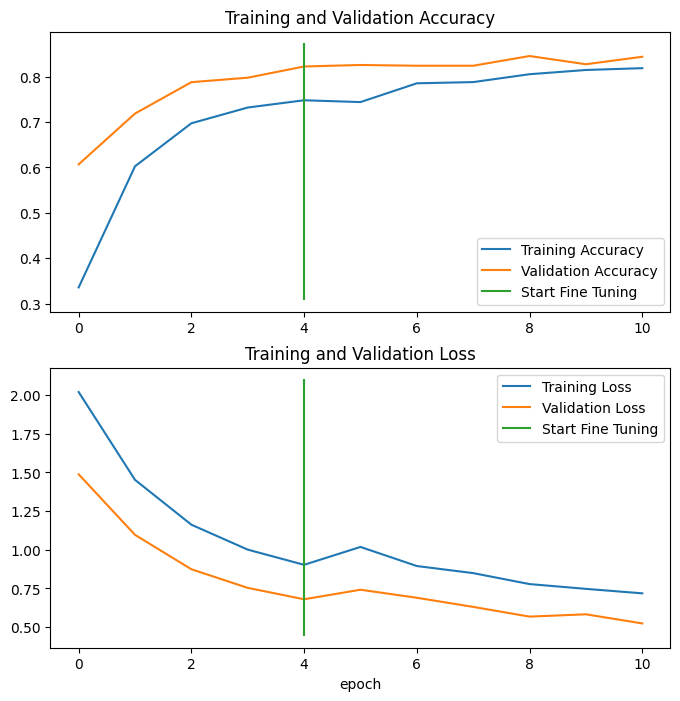

In [37]:
compare_historys(original_history=history_10_percent,
                 new_history=history_fine_10_percent_data_aug,
                 initial_epochs=5)

**Model 4: Fine-tuning an existing
model all of the data**

- We will download the full version of our 10 food classes dataset

In [38]:

# Download and unzip 10 classes of data with all images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
unzip_data("10_food_classes_all_data.zip")

# Setup data directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

--2025-10-02 10:47:09--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.99.207, 74.125.20.207, 108.177.98.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.99.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  22.0MB/s    in 6.7s    

2025-10-02 10:47:16 (73.6 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [39]:
walk_through_dir("10_food_classes_all_data")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/train'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'.

In [40]:
import tensorflow as tf
IMG_SIZE = (224,224)

train_data_10_classes_full = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                            label_mode="categorical",
                                                                            batch_size=32,
                                                                            image_size=IMG_SIZE)
test_data = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                label_mode="categorical",
                                                                image_size=IMG_SIZE)



Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


- We now have 10x more images in training classes to work with

- **model_2** has been fine-tuned on **10-percent of the data**, so to begin fine-tuning on all of the data and keep our experiment consistent, we need to revert it **back to weights we checkpointed after 5-epochs of feature extraction**

- Let's first evaluate the current **model_2**

In [41]:
# Evaluate model (this is the fine-tuned 10 percent of data version)
model_2.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - accuracy: 0.8335 - loss: 0.5426


[0.537232518196106, 0.8420000076293945]

- To keep our experiments clean, we will load a new instance of **model_2** using our **create_base_model()** function.

What we are trying to measure is

- **Experiment 3 (Previous One)-** With **model_2** having 10 layers fine-tuned for 5 more epoch on 10% of the data
- **Experiment 4 (this one)-** **model_2** with layers fine-tuned for 5 more epochs on **100%** of data

**These experiments will use the same test data to keep the evaluation on same data**

- Let's first create a new instance of **model_2**

In [53]:
model_2 = create_base_model(
                            learning_rate=0.0001
                           )

We need to make sure that we start with the **same checkpoint**. We can load the checkpointed weigths from **checkpoint_path**

In [23]:
model_2.load_weights(checkpoint_path)

/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 6 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [24]:
model_2.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ data_augmentation (Sequential)  │ (None, None, None, 3)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetv2-b0 (Functional)  │ (None, None, None,     │     5,919,312 │
│                                 │ 1280)                  │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling_layer    │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │        12,810 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,932,122 (22.63 MB)

 Trainable params: 12,810 (50.04 KB)

 Non-trainable params: 5,919,312 (22.58 MB)

In [25]:
print(len(model_2.trainable_variables))

2


This is same as our original checkpoint

In [54]:
model_2.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 59ms/step - accuracy: 0.1144 - loss: 2.2944


[2.2923455238342285, 0.11400000005960464]

**Previous steps might look confusing, so let's reiterate**

- Trained a **feature extraction learning model** on 5 epoch with **10% of the data**. The **base model** layers were frozen, and saved the model's weights using **ModelCheckpoint**
- **Fine-tuned** the same model on same 10% of the data for further **5 epochs with the top 10 layers of the base model unfrozen.**
- Saved the results and training logs each time
- Reloaded the **model_2** to do the step-2 (Fine tuning with 10 layers of the base model unfrozen)

In [55]:
for layers_number, layer in enumerate(model_2.layers):
  print(f"{layers_number} {layer.name} {layer.trainable}")

0 input_layer True
1 data_augmentation True
2 efficientnetv2-b0 False
3 global_average_pooling_layer True
4 output_layer True


Remember that **base_model** of **model_2** **efficientnetv2-b0** can be referenced by **model_2.layers[2]**

Let's unfreeze the 10 layers of **base_model** to make them trainable

In [56]:
# Unfreeze the top 10 layers in model_2's base_model
model_2_base_model = model_2.layers[2]
model_2_base_model.trainable = True

# Freeze all layers except for the last 10
for layer in model_2_base_model.layers[:-10]:
  layer.trainable = False

In [57]:

# Check which layers are tuneable in the base model
for layer_number, layer in enumerate(model_2_base_model.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_layer_12 False
1 rescaling_10 False
2 normalization_10 False
3 stem_conv False
4 stem_bn False
5 stem_activation False
6 block1a_project_conv False
7 block1a_project_bn False
8 block1a_project_activation False
9 block2a_expand_conv False
10 block2a_expand_bn False
11 block2a_expand_activation False
12 block2a_project_conv False
13 block2a_project_bn False
14 block2b_expand_conv False
15 block2b_expand_bn False
16 block2b_expand_activation False
17 block2b_project_conv False
18 block2b_project_bn False
19 block2b_drop False
20 block2b_add False
21 block3a_expand_conv False
22 block3a_expand_bn False
23 block3a_expand_activation False
24 block3a_project_conv False
25 block3a_project_bn False
26 block3b_expand_conv False
27 block3b_expand_bn False
28 block3b_expand_activation False
29 block3b_project_conv False
30 block3b_project_bn False
31 block3b_drop False
32 block3b_add False
33 block4a_expand_conv False
34 block4a_expand_bn False
35 block4a_expand_activation False
36 block4a

In [58]:
# Recompile the model (always recompile after any adjustments to a model)
model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), # lr is 10x lower than before for fine-tuning
                metrics=["accuracy"])

In [59]:
# Continue to train and fine-tune the model to our data
fine_tune_epochs = initial_epochs + 5

history_fine_10_classes_full = model_2.fit(train_data_10_classes_full,
                                           epochs=fine_tune_epochs,
                                           initial_epoch=history_10_percent.epoch[-1],
                                           validation_data=test_data,
                                           validation_steps=int(0.25 * len(test_data)),
                                           callbacks=[create_tensorboard_callback("transfer_learning", "full_10_classes_fine_tune_last_10")])

Saving TensorBoard log files to: transfer_learning/full_10_classes_fine_tune_last_10/20251002-111240
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 77s 274ms/step - accuracy: 0.4263 - loss: 1.8712 - val_accuracy: 0.8503 - val_loss: 0.6256
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 54s 228ms/step - accuracy: 0.7322 - loss: 0.9816 - val_accuracy: 0.8635 - val_loss: 0.4272
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 83s 352ms/step - accuracy: 0.7810 - loss: 0.7741 - val_accuracy: 0.8799 - val_loss: 0.3671
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 49s 205ms/step - accuracy: 0.7924 - loss: 0.6886 - val_accuracy: 0.8766 - val_loss: 0.3632
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 41s 174ms/step - accuracy: 0.7951 - loss: 0.6416 - val_accuracy: 0.8997 - val_loss: 0.2985
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 41s 172ms/step - accuracy: 0.8218 - loss: 0.5961 - val_accuracy: 0.8816 - val_loss: 0.3317


In [60]:
results_fine_tune_full_data = model_2.evaluate(test_data)
results_fine_tune_full_data

79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 69ms/step - accuracy: 0.9033 - loss: 0.2874


[0.28760388493537903, 0.902400016784668]

In [61]:
results_fine_tune_10_percent

[0.5372323989868164, 0.8420000076293945]

As we can see in the above analysis, the **Results have improved from 84% accuracy to 90% accuracy** which is a very good sign.

5
11
[0.335999995470047, 0.6026666760444641, 0.6973333358764648, 0.7319999933242798, 0.7480000257492065, 0.5754666924476624, 0.7418666481971741, 0.7774666547775269, 0.7974666953086853, 0.8053333163261414, 0.8230666518211365]


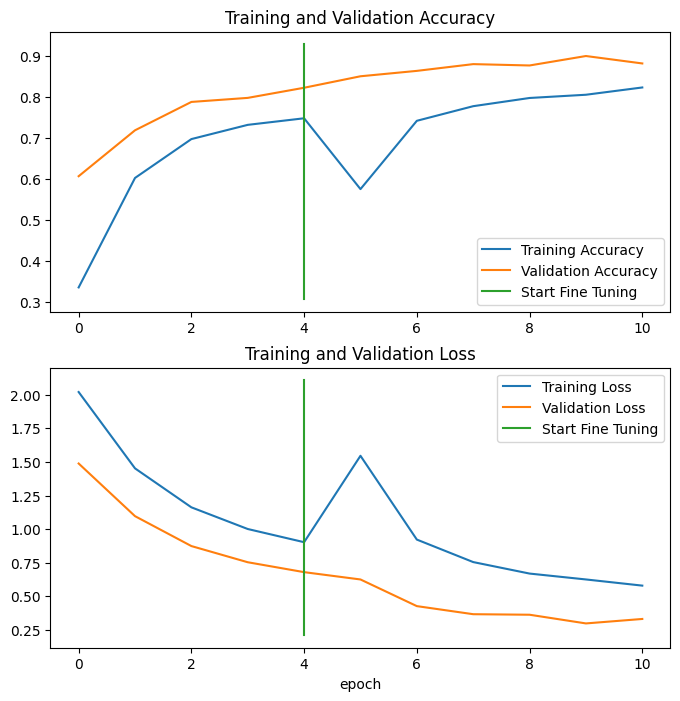

In [63]:
# How did fine-tuning go with more data?
compare_historys(original_history=history_10_percent,
                 new_history=history_fine_10_classes_full,
                 initial_epochs=5)